In [19]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [21]:
# Load the dataset
df = pd.read_csv("C:/Users/91638/Downloads/prodigy/sentimentdataset.csv")
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [22]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [23]:
# Extract year and month from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

In [24]:
# Extract year and month from the 'Timestamp' column
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

In [25]:
# Group by year and month, and count the occurrences of each sentiment
sentiment_counts = df.groupby(['Year', 'Month', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts

Sentiment   Acceptance     Acceptance        Accomplishment   Admiration   \
Year Month                                                                  
2010 5                  0                 0                0            0   
     8                  0                 0                0            0   
     11                 0                 0                0            0   
2011 6                  0                 0                0            0   
     7                  0                 0                0            0   
...                   ...               ...              ...          ...   
2023 6                  0                 1                0            0   
     7                  0                 0                0            0   
     8                  0                 0                0            0   
     9                  0                 0                0            0   
     10                 0                 0                0            0   

Sentiment   Admiration     Admiration      Adoration      Adrenaline       \
Year Month                                                                  
2010 5                  0               0              0                0   
     8                  0               0              0                0   
     11                 0               0              0                0   
2011 6                  0               0              0                0   
     7                  0               0              0                0   
...                   ...             ...            ...              ...   
2023 6                  0               0              0                0   
     7                  0               0              0                0   
     8                  0               0              0                0   
     9                  0               0              0                0   
     10                 0               0              0                0   

Sentiment   Adventure   Affection      ...  Vibrancy   Whimsy          \
Year Month                             ...                              
2010 5               0              0  ...          0               0   
     8               0              0  ...          0               0   
     11              0              0  ...          0               0   
2011 6               0              0  ...          0               0   
     7               0              0  ...          0               0   
...                ...            ...  ...        ...             ...   
2023 6               0              0  ...          0               0   
     7               0              0  ...          0               0   
     8               0              0  ...          0               0   
     9               0              0  ...          0               0   
     10              0              0  ...          0               0   

Sentiment   Whispers of the Past   Winter Magic   Wonder   Wonder       \
Year Month                                                               
2010 5                          0              0        0            0   
     8                          0              0        0            0   
     11                         0              0        0            0   
2011 6                          0              0        0            0   
     7                          0              0        0            0   
...                           ...            ...      ...          ...   
2023 6                          0              0        0            0   
     7                          0              0        0            0   
     8                          0              0        0            0   
     9                          0              0        0            0   
     10                         0              0        0            0   

Sentiment   Wonder         Wonderment      Yearning   Zest   
Year Month           

In [26]:
# Plotting
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

C:\Users\91638\AppData\Local\Temp\ipykernel_2468\1341266074.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


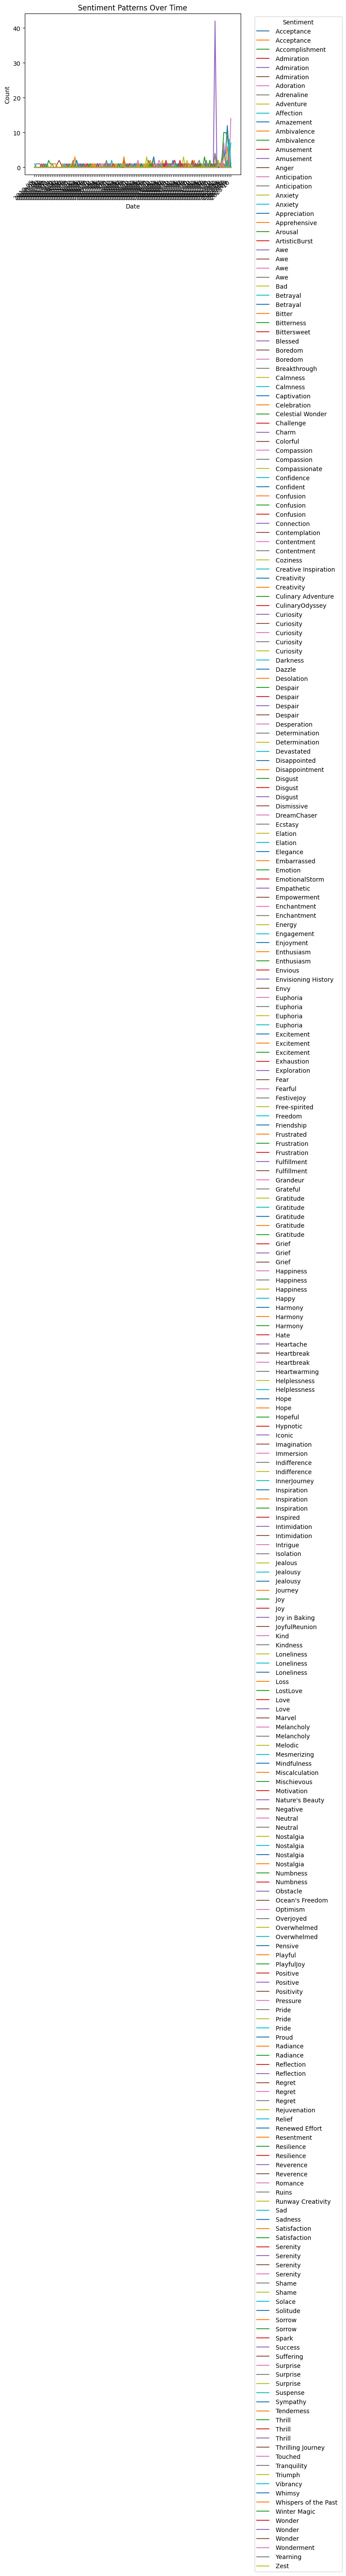

In [27]:
# Plot sentiment counts over months for each sentiment
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index.get_level_values('Year').astype(str) + '-' + sentiment_counts.index.get_level_values('Month').astype(str).str.zfill(2), 
             sentiment_counts[sentiment], 
             label=sentiment)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Sentiment Patterns Over Time')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()